# A little ODE (motivation for numerical calculus)

### The basic theory

A first order ordinary differential equation takes the form
$$y' = f(y,t).$$
In this equation, $f$ is a function of the two variables $y$ and $t$ where $t$ is an independent variable and $y$ is assumed to be a function of $t$. A solution is a function $y(t)$ that makes the equation true.

For example, if $f(y,t) = y(2-y)$, then any function of the form 
$$y(t)=2e^{2t}/(e^{2t}+c)$$
solves the equation since
$$y'(t) = \frac{4 c e^{2 t}}{\left(c+e^{2 t}\right)^2} = y(t)(2-y(t)).$$

Often, an ODE will be accompanied by an initial condition to form an initial value problem (or IVP). If, in the above problem, we require that $y(0)=1$, then $c$ is forced to be $1$.

## `odeint`
The basic ODE solver in SciPy is `scipy.integrate.odeint`. Let's import it together with some of our standard imports.

In [1]:
# Some tools we know
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# And a couple new
from scipy.misc import derivative
from scipy.integrate import odeint

### A semi made up example

Let's explore
$$y' = 2ye^{-y/3} \: \text{ subject to } \: y(-5) = 0.01.$$
This is a variation on the Logistic equation above. We can solve it over the interval $[-5,5]$ using `odeint` like so:

In [2]:
def f(y,t): return 2*y*np.exp(-y/3)
ts = np.linspace(-5,5,100)
sol = odeint(f,0.01,ts)
sol[:8]

array([[ 0.01      ],
       [ 0.01222964],
       [ 0.01495391],
       [ 0.01828134],
       [ 0.02234366],
       [ 0.02730047],
       [ 0.03334471],
       [ 0.04070901]])

The solution is just a list of numbers which we can plot like so:

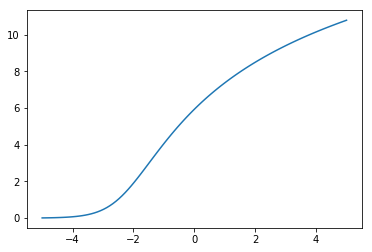

In [3]:
plt.plot(ts,sol)

It looks like there's an inflection point. If we want to find it, we'd need to express the solution as a function and we need to be able to compute the second derivative of that function. Sounds like a job for interpolation!

In [4]:
interpolated_f = interp1d(ts,[y[0] for y in sol], kind=3)
def ff(x): return derivative(interpolated_f, x, dx=0.001,n=2)
brentq(ff,-2,0)

-1.4906497474267157

### The Lorenz equations - a 3D example
It's probably worth mentioning that there are unbelievably cool things that can be explored with ODEs from a numerical perspective.
One very fun example is formed by the famous Lorenz equations:
$$
\begin{align}
  x' &= \sigma(y-x) \\
  y' &= \rho x - y - xz \\
  z' &= xy - \beta z.
\end{align}
$$
These equations, formulated by meteorologist Ed Lorenz, form a *very* stripped down model of water starting to boil in a pot. For some choices of the parameters $\beta$, $\sigma$, and $\rho$, the solution is drawn to a so-called *strange attractor* - a hallmark of chaos. Let's take a look.

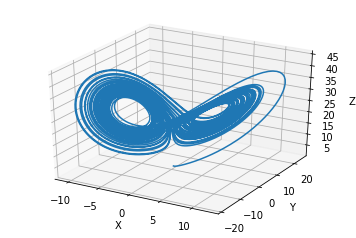

In [5]:
from mpl_toolkits.mplot3d import Axes3D
def lorenz(xyz, t, s=3, r=26.5, b=1):
    x,y,z = xyz
    xp = s*(y - x)
    yp = r*x - y - x*z
    zp = x*y - b*z
    return xp, yp, zp
ts = np.linspace(0,100,10000)
sol = odeint(lorenz, [0,1,1.05], ts)
xs,ys,zs = sol.T

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()